In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn import metrics
from matplotlib import pyplot
from scipy import stats

plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
sns.set_style("white")

<ipython-input-1-42b40561f429>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:

df = pd.read_csv('eqls_2011.csv')
df_map = pd.read_csv('eqls_api_map.csv', encoding='latin1')

In [3]:
# we are only interested in the UK
df = df.query('Y11_Country == 27')

var_map = {"Y11_Q42": "SRH",
           'Y11_Deprindex': 'DeprIndex',
           "Y11_Accommproblems": 'AccomProblems',
           "Y11_HHsize": "HouseholdSize",
           "Y11_Q32": "Children",
           "Y11_ISCEDsimple":"ISCED",
           "Y11_SocExIndex":"SocialExclusionIndex",
           "Y11_MWIndex": "MentalWellbeingIndex",
           "Y11_Agecategory":"AgeCategory",
           "Y11_HH2a":"Gender",
           "Y11_Q31":"MaritalStatus",
           "Y11_Country":"Country"
}

df.rename(columns=var_map, inplace=True)
df_set = df[var_map.values()]

<ipython-input-3-f1887bf2be79>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=var_map, inplace=True)


In [4]:
df_model = df_set.dropna()

In [5]:
# Missing data imputation


In [6]:
df_model.head()

,SRH,DeprIndex,AccomProblems,HouseholdSize,Children,ISCED,SocialExclusionIndex,MentalWellbeingIndex,AgeCategory,Gender,MaritalStatus,Country
36,2.0,2.0,2.0,3,0.0,2.0,2.50,72.0,1,1,4.0,27
38,3.0,5.0,2.0,4,2.0,6.0,4.25,36.0,3,1,1.0,27
39,2.0,0.0,0.0,4,0.0,6.0,1.75,56.0,1,2,4.0,27
40,3.0,0.0,1.0,4,3.0,6.0,2.00,92.0,2,1,1.0,27
41,2.0,0.0,0.0,3,0.0,6.0,2.00,72.0,1,1,4.0,27


Self-rated health SRH is the rating that individuals give to their health status. It is a global measure both of mental state and of physical condition. More info in Model1 file :)

In [7]:
df_model['SRH'].unique()

array([2., 3., 1., 4., 5.])

In [8]:
# dichotomise SRH Self-Rated Health
df_model['SRH_binary'] = df_model.SRH.apply(lambda x: 1 if float(x) <= 3 else 0)

<ipython-input-8-6bb219c2696a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['SRH_binary'] = df_model.SRH.apply(lambda x: 1 if float(x) <= 3 else 0)


In [9]:
df_model.head()

,SRH,DeprIndex,AccomProblems,HouseholdSize,Children,ISCED,SocialExclusionIndex,MentalWellbeingIndex,AgeCategory,Gender,MaritalStatus,Country,SRH_binary
36,2.0,2.0,2.0,3,0.0,2.0,2.50,72.0,1,1,4.0,27,1
38,3.0,5.0,2.0,4,2.0,6.0,4.25,36.0,3,1,1.0,27,1
39,2.0,0.0,0.0,4,0.0,6.0,1.75,56.0,1,2,4.0,27,1
40,3.0,0.0,1.0,4,3.0,6.0,2.00,92.0,2,1,1.0,27,1
41,2.0,0.0,0.0,3,0.0,6.0,2.00,72.0,1,1,4.0,27,1


In [10]:
# test train split using scikit learn, defining random state for reproducibility
trainX_model1, testX_model1, trainy_model1, testy_model1 = train_test_split(df_model[['AgeCategory','DeprIndex']], df_model.SRH_binary.values, test_size=0.3, random_state=2)

In [11]:
model1 = LogisticRegression(penalty='none')
result_model1 = model1.fit(trainX_model1, trainy_model1)
# Intercept and Coeficients for 'AgeCategory' and 'DeprIndex'
result_model1.intercept_, result_model1.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


(array([4.50665758]), array([[-0.47165863, -0.43115774]]))

In the output, ‘Iterations‘ refer to the number of times the model iterates over the data to optimize the model.

## Evaluation through predicting new data
  
Now we evaluate our model using our test dataset.

Logistic regression

In [12]:
# performing predictions on the test dataset
yhat = result_model1.predict_proba(testX_model1)[:,1]
pred_y_model1 = list(map(round, yhat))

# comparing first 10 original and predicted values of y
print('Actual values', list(testy_model1)[:10])
print('Predictions :', pred_y_model1[:10])

Actual values [1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
Predictions : [1, 1, 1, 1, 1, 0, 1, 1, 1, 1]


Accuracy: 0.8803986710963455
Precision: 0.8902027027027027
Recall: 0.9868913857677902


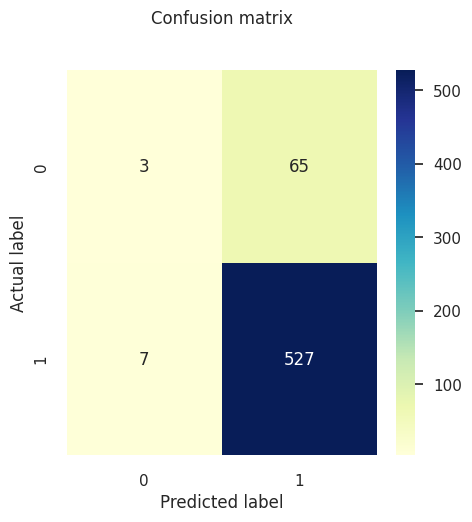

In [13]:
# confusion matrix using sklearn
cnf_matrix = metrics.confusion_matrix(testy_model1,pred_y_model1)

def plt_cnf_mat(cnf_matrix, ax, class_names=[0,1]):
    tick_marks = np.arange(len(class_names))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(class_names)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.set_title('Confusion matrix', y=1.1)
    ax.set_ylabel('Actual label')
    ax.set_xlabel('Predicted label')


fig, ax = plt.subplots(1,1, figsize = (5,5))
plt_cnf_mat(cnf_matrix, ax)


print("Accuracy:",metrics.accuracy_score(testy_model1, pred_y_model1))
print("Precision:",metrics.precision_score(testy_model1, pred_y_model1))
print("Recall:",metrics.recall_score(testy_model1, pred_y_model1)) # what is recall?

In [14]:
testy_model1_minority = abs(testy_model1 - 1)
pred_y_model1_minority = abs(np.array(pred_y_model1) -1)

print("Specificity:",metrics.recall_score(testy_model1_minority, pred_y_model1_minority))

Specificity: 0.04411764705882353


The classification matrix  might not be the best tool to evaluate the model in this scenario. Particularly because it shows a snapshot of the results being mapped from a predicted probability using a threshold of $p(x)> 0.5$.


### Investigating threshold values


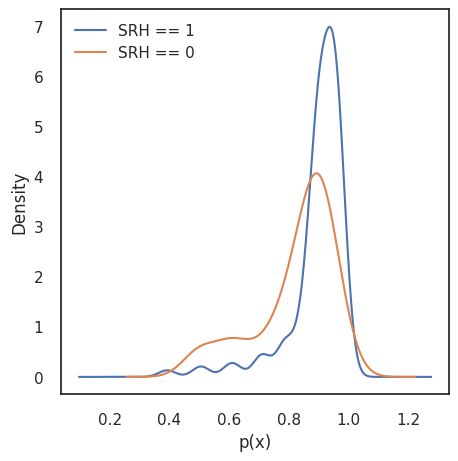

In [16]:
# link the prediction to the label values
df_labels = pd.DataFrame({'prediction': yhat,
     'label': testy_model1})

fig, ax = plt.subplots(1,1, figsize = (5,5))
df_labels[df_labels['label']==1]['prediction'].plot.kde(label='SRH == 1')
df_labels[df_labels['label']==0]['prediction'].plot.kde(label='SRH == 0')
pyplot.xlabel('p(x)')
pyplot.legend()



In [17]:
df_labels.head()

,prediction,label
0,0.895516,1
1,0.783478,1
2,0.932139,1
3,0.932139,1
4,0.895516,0


In [18]:
print ('Mean value for SRH ==1,', round(df_labels[df_labels['label']==1]['prediction'].mean(),3))
print ('Mean value for SRH ==0,', round(df_labels[df_labels['label']==0]['prediction'].mean(),3))
print ('Percentage of cases with SRH ==0,', round(df_labels[df_labels['label']==0]['prediction'].count()/df_labels.shape[0],3))

Mean value for SRH ==1, 0.895
Mean value for SRH ==0, 0.823
Percentage of cases with SRH ==0, 0.113


###ROC Curves




In [19]:
# function from https://stackoverflow.com/questions/22518230/creating-a-threshold-coded-roc-plot-in-python
def plot_roc(labels, predictions, positive_label, thresholds_every=10, title='', c='darkorange'):
    # fp: false positive rates. tp: true positive rates
    fp, tp, thresholds = roc_curve(labels, predictions, pos_label=positive_label)
    roc_auc = roc_auc_score(labels, predictions)

    plt.plot(fp, tp, label=title+' ROC curve (area = %0.2f)' % roc_auc, linewidth=2, color=c)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=2)
    plt.xlabel('False positives rate')
    plt.ylabel('True positives rate')
    plt.xlim([-0.03, 1.0])
    plt.ylim([0.0, 1.03])
    plt.title('ROC curve (numbers are threshold values)')
    plt.legend(loc="lower right")
    plt.grid(True)

    # plot some thresholds
    thresholdsLength = len(thresholds)
    for i in range(0, thresholdsLength, thresholds_every):
        threshold_value_with_max_three_decimals = str(thresholds[i])[:4]
        plt.text(fp[i] - 0.05, tp[i] + 0.015, threshold_value_with_max_three_decimals, fontdict={'size': 10},color=c)

In [20]:
lr_probs_model1 = result_model1.predict_proba(testX_model1)
# keep probabilities for the positive outcome only
lr_probs_model1 = lr_probs_model1[:, 1]

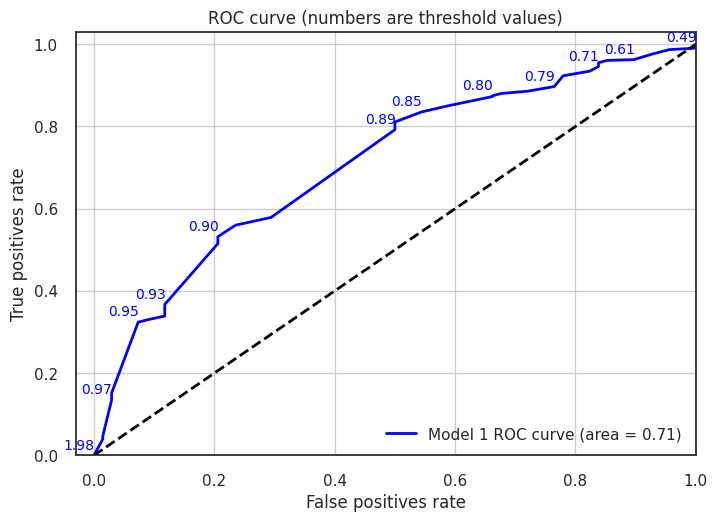

In [21]:
plot_roc(testy_model1, lr_probs_model1, positive_label=1, thresholds_every=3, title="Model 1",c='blue')

The AUC values printed above reflects the area under the ROC curve and provides a measure of how discriminant the model is between the two classes.  

A value of 0.5 for AUC indicates that the ROC curve will fall on the diagonal (i.e., 45-degree line) and hence suggests that the diagnostic test has no discriminatory ability.
Youden index method

In [24]:
# function inspired by https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
def find_optimal_threshold(target, predicted):
    """ Find the optimal probability threshold for a classification model.
    Parameters
    ----------
    target : Matrix with label data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------
    a float, with optimal cutoff value

    """
    fpr, tpr, thresholds = roc_curve(target, predicted)
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

threshold = find_optimal_threshold(df_labels['label'], df_labels['prediction'])
print (round(threshold,3))

0.906


This is quite far from the 0.5 value we originally had! Let's see how our classification matrix does now using this new threshold.

In this case we have decided that the optimal threshold value is the one that, which which maximises the True Positive rate and minimizes the False Positive rate. However, the definition of **optimal** really depends of the research question or the task we are to solve. An alternative would be to give more importance in accurately classifying our `SRH=0` class and try to maximise the True Negative Rate.


Accuracy: 0.553156146179402

Precision: 0.9522184300341296
Recall: 0.5224719101123596

Specificity: 0.7941176470588235


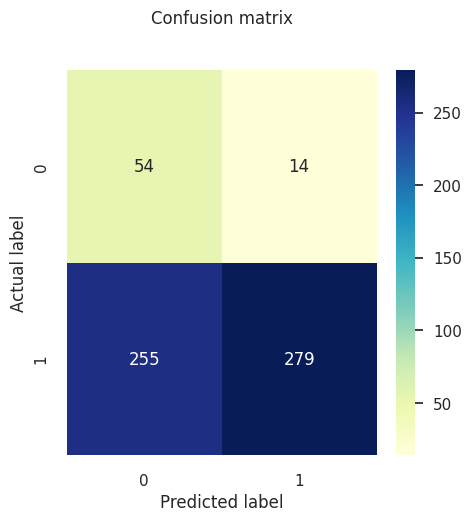

In [25]:
# performing predictions on the test dataset
# yhat = result_model1.predict(testX_model1)
yhat = result_model1.predict_proba(testX_model1)[:,1]
pred_y_model1 =  [1 if x > threshold else 0 for x in yhat]


# confusion matrix using sklearn
cnf_matrix = metrics.confusion_matrix(testy_model1,pred_y_model1)

fig, ax = plt.subplots(1,1, figsize = (5,5))
plt_cnf_mat(cnf_matrix, ax)


print("Accuracy:",metrics.accuracy_score(testy_model1, pred_y_model1))

print ()
print("Precision:",metrics.precision_score(testy_model1, pred_y_model1))
print("Recall:",metrics.recall_score(testy_model1, pred_y_model1))

print ()
testy_model1_minority = abs(testy_model1 - 1)
pred_y_model1_minority = abs(np.array(pred_y_model1) -1)

print("Specificity:",metrics.recall_score(testy_model1_minority, pred_y_model1_minority))

## Model 2: Model 1 + Education, Children, and Accommodation Problems

Let's increase the complexity to our model by adding more predictors.

In [26]:
trainX_model2, testX_model2, trainy_model2, testy_model2 = train_test_split(df_model[['AgeCategory','DeprIndex','ISCED',"Children","AccomProblems"]], df_model.SRH_binary.values, test_size=0.3, random_state=2)

model2 = LogisticRegression(penalty='none')
result_model2 = model1.fit(trainX_model2, trainy_model2) #Fit model
result_model2.intercept_, result_model2.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


(array([3.76598777]),
 array([[-0.41338651, -0.36976993,  0.21194612, -0.13617135, -0.1758265 ]]))

### Comparing predicted values

Running the model on the test set and comparing the distributions.

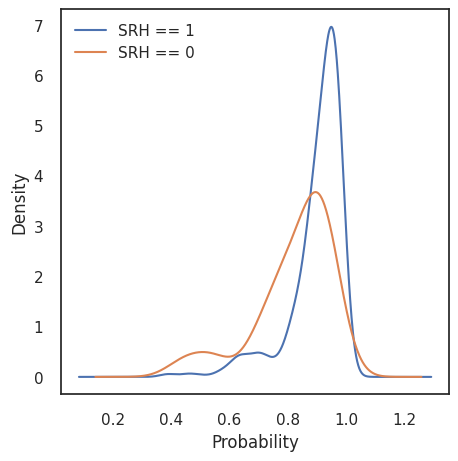

In [27]:
# link the prediction to the label values
yhat_model2 = result_model2.predict_proba(testX_model2)[:,1]
df_labels = pd.DataFrame({'prediction': yhat_model2,
     'label': testy_model2})

fig, ax = plt.subplots(1,1, figsize = (5,5))
df_labels[df_labels['label']==1]['prediction'].plot.kde(label='SRH == 1')
df_labels[df_labels['label']==0]['prediction'].plot.kde(label='SRH == 0')
pyplot.xlabel('Probability')
pyplot.legend()

The shape of the probability distributions look similar to what we observed in **Model 1** (maybe the tails for class `SHR=0` are longer). Again, we can observe that using the default threshold value around 0.5 will not be optimal in this case and a higher value should be chosen.



In [29]:
threshold_model2 = find_optimal_threshold(testy_model2, yhat_model2)
print ('Probability threshold cut',round(threshold_model2,3))
print()

Probability threshold cut 0.918



### ROC curves
The probability threshold value is slightly lower than for model **Model 1**, but not significantly, given that the predicted distributions are quite similar.



In [30]:
lr_probs_model2 = result_model2.predict_proba(testX_model2)
# keep probabilities for the positive outcome only
lr_probs_model2 = lr_probs_model2[:, 1]

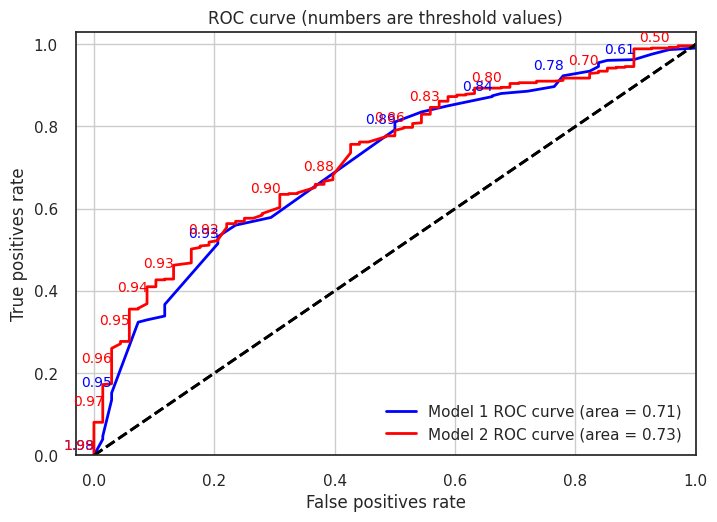

In [31]:
plot_roc(testy_model1, lr_probs_model1, positive_label=1, thresholds_every=5, title="Model 1",c='blue')
plot_roc(testy_model2 , lr_probs_model2, positive_label=1, thresholds_every=15, title="Model 2",c='red')

In [46]:
#The ROC curve for Model 2 has a higher granularity of steps in which the True and False Positive rates are evaluated.
#Despite the point above, AUC values and overall ROC shapes are pretty much the same.
ll_null = null_log_likelihood(testy_model2)
ll_model2 = log_likelihood(result_model2, testX_model2, testy_model2)
pseudo_r2_2 = 1 - ll_model2 / ll_null

print(ll_model2, pseudo_r2_2)

-194.59709342269468 0.08337366998433948


### Classification matrix



Accuracy: 0.584717607973422

Precision: 0.9522292993630573
Recall: 0.5599250936329588

Specificity: 0.7794117647058824


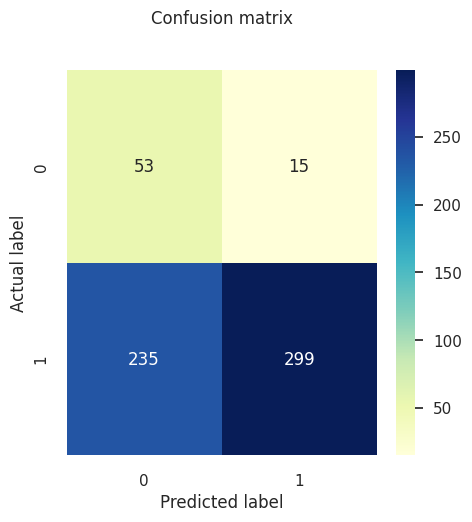

In [39]:
#Take a look at our classification performance, using the optimal threshold value of classification for this model.

pred_y_model2 =  [1 if x > threshold_model2 else 0 for x in yhat_model2]

cnf_matrix_model2  = metrics.confusion_matrix(testy_model2,pred_y_model2)

fig, ax = plt.subplots(1,1, figsize = (5,5))
plt_cnf_mat(cnf_matrix_model2 , ax)


print("Accuracy:",metrics.accuracy_score(testy_model2 , pred_y_model2 ))

print()
print("Precision:",metrics.precision_score(testy_model2 , pred_y_model2 ))
print("Recall:",metrics.recall_score(testy_model2 , pred_y_model2 ))


print ()
testy_model2_minority = abs(testy_model2 - 1)
pred_y_model2_minority = abs(np.array(pred_y_model2) -1)

print("Specificity:",metrics.recall_score(testy_model2_minority, pred_y_model2_minority))

In [44]:
#Comparing to Model 1:
#Our general accuracy improved slightly (from 0.55 to 0.58!).
# The Recall increased (from 0.52 to 0.55).Specificity decreased slightly.
#For these cases, we can use the F1-score, which is is the harmonic mean of Precision and Recall
#and gives a better measure of the incorrectly classified cases than the Accuracy metric.
from sklearn.metrics import classification_report
print ('Model2:',classification_report(testy_model2, pred_y_model2))
print ('Model1:',classification_report(testy_model1, pred_y_model1))

Model2:               precision    recall  f1-score   support

           0       0.18      0.78      0.30        68
           1       0.95      0.56      0.71       534

    accuracy                           0.58       602
   macro avg       0.57      0.67      0.50       602
weighted avg       0.87      0.58      0.66       602

Model1:               precision    recall  f1-score   support

           0       0.17      0.79      0.29        68
           1       0.95      0.52      0.67       534

    accuracy                           0.55       602
   macro avg       0.56      0.66      0.48       602
weighted avg       0.86      0.55      0.63       602



In [45]:
print ('Model 1:', metrics.f1_score(testy_model1 , pred_y_model1))
print ('Model 2:', metrics.f1_score(testy_model2 , pred_y_model2))


Model 1: 0.6747279322853689
Model 2: 0.7051886792452831
